# Lógica Computacional 24/25

**Grupo 09**

- João Afonso Almeida Sousa (A102462)
- Rafael Cunha Costa (A102526)
  

# Problema 2

Relativo ao programa do problema anterior,

    1. Construa um “Control Flow Automaton (CFA)” que determina este programa. Identifique os locais e as transições/ramos.  Numa abordagem orientada às pré-condições  identifique os transformadores de predicados associados aos vários locais e os “switches” associados aos vários ramos. 
    2. Construa em `z3` o sistema de equações que representa o comportamento deste sistema dinâmico sob o ponto de vista da prova de segurança e verifique a segurança do programa através da resolução (total ou parcial) deste sistema.
    > sugere-se (não é obrigatório mas é valorizado !), na alínea (a), uma representação do CFA através de  um grafo orientado  implementado  em `networkx`  e a sua compilação para o sistema de equações.


# Inicialização

Para criar e representar o grafo, usamos a biblioteca networkx.

Para instalar o Z3py, basta correr o seguinte comando:

In [ ]:
pip install networkx

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Definir o grafo

In [26]:
cfa = nx.DiGraph()

# Adicionar os nodos

In [27]:
nodes = ["Start", "Loop", "End", "Error"]
cfa.add_nodes_from(nodes)

# Definir as transições

In [28]:
cfa.add_edge("Start", "Loop", label="Init: r = a, rline = b, ...")
cfa.add_edge("Loop", "Loop", label="While rline != 0")
cfa.add_edge("Loop", "End", label="If rline == 0")
cfa.add_edge("Start", "Error", label="Overflow/Error")
cfa.add_edge("Loop", "Error", label="Overflow/Error")

# Ajustar e representar o grafo

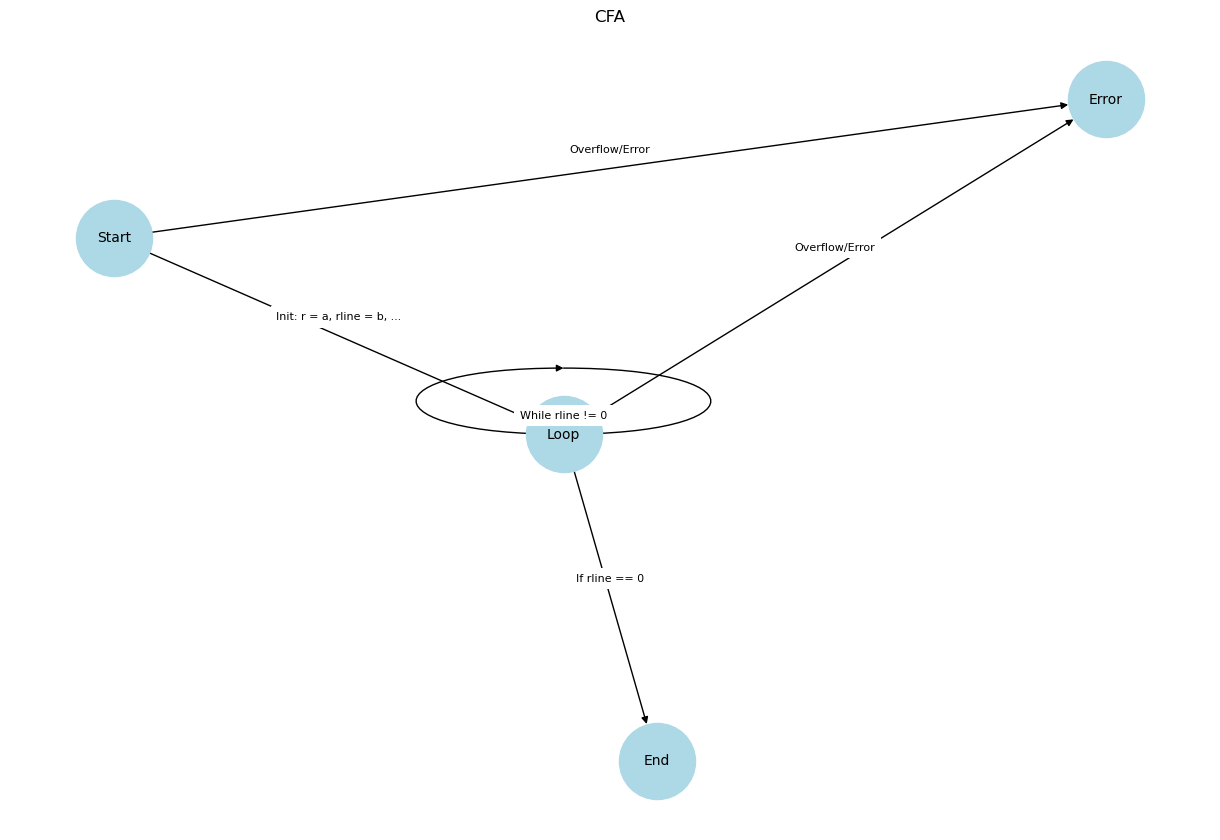

In [30]:
pos = nx.spring_layout(cfa, k=0.8, iterations=50)  # Adjust spacing between nodes

plt.figure(figsize=(12, 8))
nx.draw(
    cfa, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=10
)

edge_labels = nx.get_edge_attributes(cfa, "label")
for edge, label in edge_labels.items():
    x1, y1 = pos[edge[0]]
    x2, y2 = pos[edge[1]]
    label_pos = ((x1 + x2) / 2, (y1 + y2) / 2 + 0.05)  # Desviar as labels por motivos de visibilidade
    plt.text(
        *label_pos, label, fontsize=8, ha="center", va="center", bbox=dict(facecolor="white", edgecolor="none")
    )

plt.title("CFA")
plt.show()

# Inicialização

Para resolver os problemas de satisfação de restrições, usamos o Z3py, uma biblioteca Python que cria uma interface para o Z3, um solver SMT.

Para instalar o Z3py, basta correr o seguinte comando:

In [ ]:
pip install z3-solver

In [31]:
from z3 import *

# Declaração dos BitVecs

In [32]:
n = 32  # Tamanho dos BitVectors
a = BitVec('a', n)
b = BitVec('b', n)
r = BitVec('r', n)
rline = BitVec('rline', n)
s = BitVec('s', n)
sline = BitVec('sline', n)
t = BitVec('t', n)
tline = BitVec('tline', n)

# Variáveis do proximo estado
r_next = BitVec('r_next', n)
rline_next = BitVec('rline_next', n)
s_next = BitVec('s_next', n)
sline_next = BitVec('sline_next', n)
t_next = BitVec('t_next', n)
tline_next = BitVec('tline_next', n)

# Declaração dos nodos

In [33]:
L_start = Bool('L_start')
L_loop = Bool('L_loop')
L_start = Bool('L_end')
L_loop = Bool('L_error')

# Estado inicial

In [34]:
init = And(
    L_start,
    r == a,
    rline == b,
    s == 1,
    sline == 0,
    t == 0,
    tline == 1
)

# Calcular as variáveis do próximo estado

In [35]:
transitions = And(
    Implies(L_start, L_loop),
    Implies(L_loop, If(loop_condition, L_loop, L_end)),
    Implies(Or(r == 0, r > 2**(n-1) - 1), L_error)
)

# Condição do while

In [36]:
loop_condition = rline != 0

# Atualizar as variáveis

In [37]:
state_update = And(
    r_next == rline,
    rline_next == r - UDiv(r, rline) * rline,
    s_next == sline,
    sline_next == s - UDiv(r, rline) * sline,
    t_next == tline,
    tline_next == t - UDiv(r, rline) * tline
)

# Inicializar o solver

In [39]:
solver = Solver()
solver.add(init)
solver.add(transitions)
solver.add(state_update)
solver.add(Not(L_error))

# Verify safety
if solver.check() == sat:
    print("O estado de erro é atingivel.")
else:
    print("O estado de erro não é atingivel.")

O estado de erro não é atingivel.
